### Figure 1: 
### _Synthetic Tensor Experiment_

---

We consider the following synthetic problem: 

Generate an MPO $H$ and MPS $\psi$ with bond dimension $D=\chi=20$ and $n=100$ sites.

- Each site tensor for both $H$ and $\psi$ are populated with uniformly random numbers between $-\alpha$ and 1 . Here, $0 \leq \alpha \leq 1$ is a tunable parameter that sets the difficulty of the problem. 

- If $\alpha=0, H \psi$ is very compressible and computing the compressed product $H \psi$ is easy; if $\alpha=1$, then $H \psi$ is much less compressible and computing $H \psi$ is hard. 

- We set $\alpha=1 / 2$. 

In [1]:
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time 

import sys
import os
sys.path.insert(0, os.path.abspath('..'))
from util.plotting import load_specific_experiment_results,extract_experiment_data,plot_runtime_vs_accuracy

### Result :

---

In [2]:

file_path = "data/fig1_final.csv"
results = load_specific_experiment_results(file_path)
names = ['naive', 'rand_then_orth', 'random+oversample', 'random', 'density', 'zipup', 'fit']
times, std_times, accs, std_accs = extract_experiment_data(results, names)

Data loaded from data/fig1_final.csv


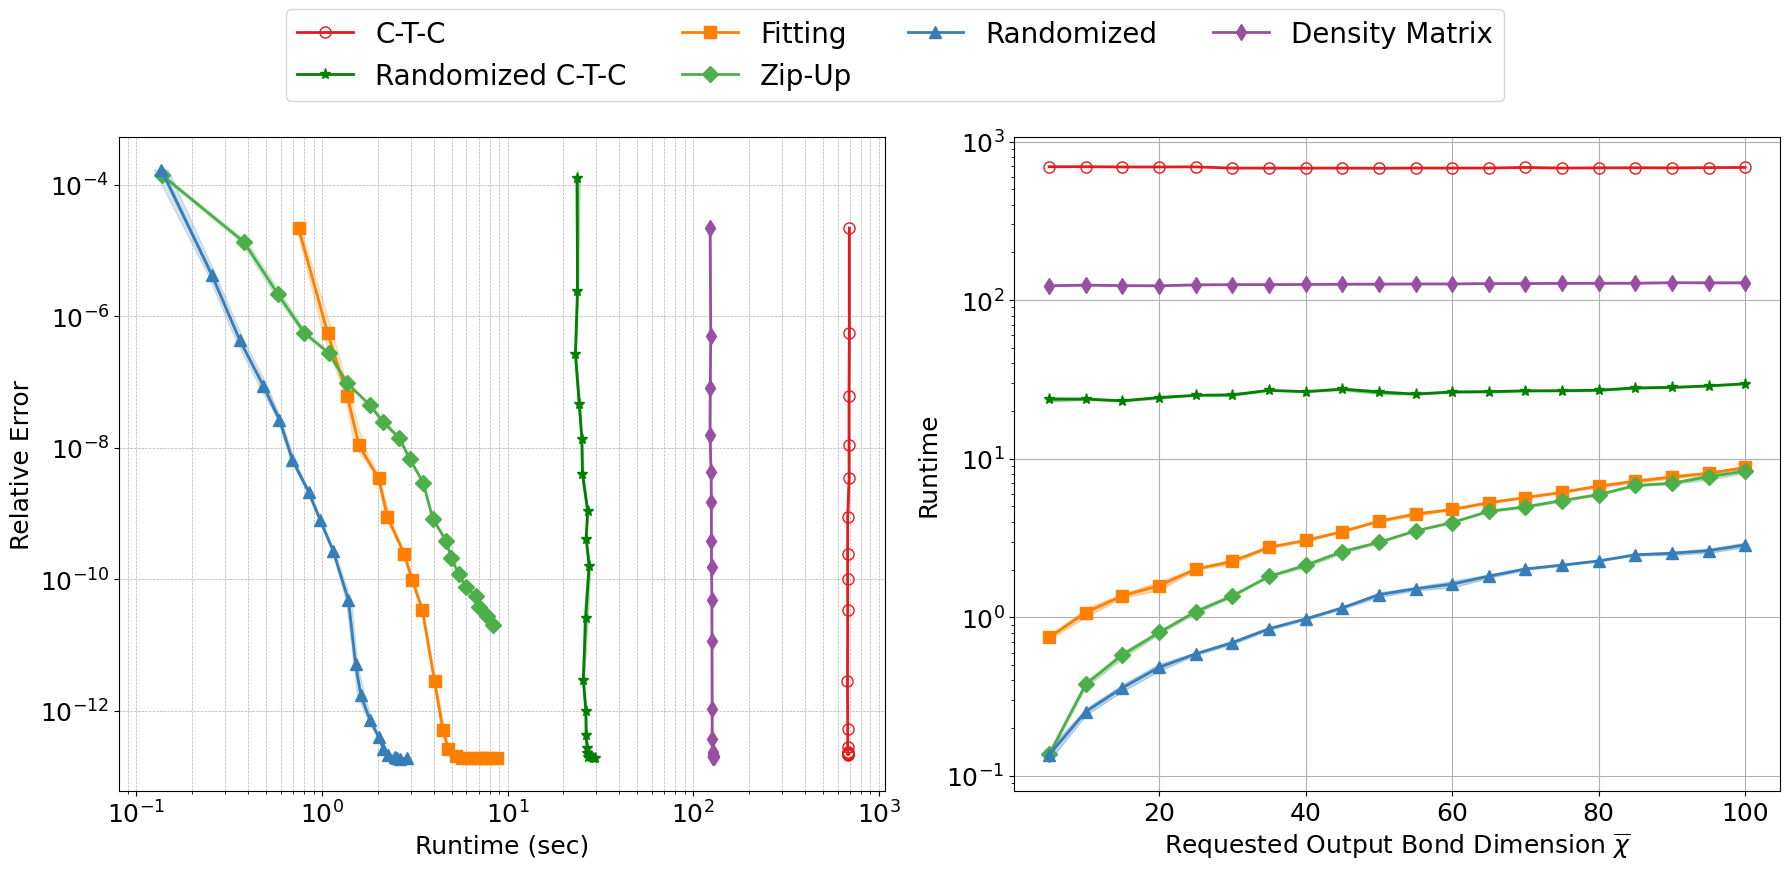

In [3]:
names = ['naive','rand_then_orth','fit','zipup','random','density']#,'zipup','fit','density','rand_then_orth']
bond_dims = range(5, 105, 5) 
plot_runtime_vs_accuracy(names, times, std_times, accs, std_accs, bond_dims, times, std_times)

### Experiment Driver

---

In [4]:
from util.benchmarking import generate_baseline,fixed_synth_tensor_experiment

a = -.5
chi = 10#50
n = 20#100
mpo,mps,baseline = generate_baseline(n,chi,a,dtype=np.complex128)

Using Python implementation for incQR
An exception occurred: No module named 'libincrementalqr'
Generating baseline contraction...


In [5]:
names = ['naive','rand_then_orth','fit','zipup','random','density']#,'zipup','fit','density','rand_then_orth']
bond_dims = range(5, 55, 5)
times, std_times, accs, std_accs = fixed_synth_tensor_experiment(
    mpo=mpo,
    mps=mps,
    baseline=baseline,
    bond_dims=bond_dims,
    names=names,
    num_runs=1,
    highres=True,
    return_data=True
)
plot_runtime_vs_accuracy(names, times, std_times, accs, std_accs, bond_dims, times, std_times)

,Bond Dimension,naive Mean Time,naive Time Std,naive Mean Accuracy,naive Accuracy Std,rand_then_orth Mean Time,rand_then_orth Time Std,rand_then_orth Mean Accuracy,rand_then_orth Accuracy Std,fit Mean Time,...,zipup Mean Accuracy,zipup Accuracy Std,random Mean Time,random Time Std,random Mean Accuracy,random Accuracy Std,density Mean Time,density Time Std,density Mean Accuracy,density Accuracy Std
0,5,1.51e-01,0.00e+00,1.41e-03,0.00e+00,4.23e-03,0.00e+00,1.23e-02,0.00e+00,5.15e-03,...,6.21e-03,0.00e+00,2.41e-03,0.00e+00,7.96e-03,0.00e+00,1.71e-02,0.00e+00,1.40e-03,0.00e+00
1,10,3.55e-02,0.00e+00,4.02e-05,0.00e+00,3.76e-03,0.00e+00,1.17e-04,0.00e+00,7.42e-03,...,6.71e-04,0.00e+00,3.59e-03,0.00e+00,3.00e-04,0.00e+00,1.90e-02,0.00e+00,4.02e-05,0.00e+00
2,15,3.80e-02,0.00e+00,4.31e-06,0.00e+00,4.14e-03,0.00e+00,1.62e-05,0.00e+00,9.98e-03,...,1.58e-04,0.00e+00,5.06e-03,0.00e+00,1.70e-05,0.00e+00,1.95e-02,0.00e+00,4.31e-06,0.00e+00
